In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from IPython.core.pylabtools import figsize
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
figsize(40,20)

In [2]:
data = pd.read_csv('winequality-red.csv') # читаем данные сета из comma-separated file

In [3]:


def plot_features_coefs(x, y):
  fig = plt.figure(figsize=(15, 15))
  ax = fig.add_subplot(111)
  ax.bar(x, height=y, label='Вклад признаков')
  ax.tick_params(axis='x', which='major', rotation=45)
  plt.legend()
  plt.show()



In [4]:
data.head(15) # вывод некоторого количества строк данных 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
print(data.shape) # размер датасета всего (строки, столбцы)

data.drop_duplicates(inplace=True) # удалене повторяющихся строк (inplace - удалить дубликаты в самом образце или вернуть копию с удаленными)
 # data.drop([ '__' ], axis = 'columns') - удалениие признаков, если не нужны
data.shape # были удалены 240 повторяющихся строк

(1599, 12)


(1359, 12)

In [6]:
corr = data.corr().abs()

In [7]:
ncorr = corr.copy()
# массив коррелирующих признаков для удаления
toDel = []

for row in ncorr.index:
    for column in ncorr[row].index: 
        if ncorr[row][column] >= 0.65 and ncorr[row][column] != 1: 
            if not row in toDel:
              toDel.append(column)
            ncorr[row][column] = '*'
        else:
            ncorr[row][column] = ' '
ncorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,*,,,,,*,*,,,
volatile acidity,,,,,,,,,,,,
citric acid,*,,,,,,,,,,,
residual sugar,,,,,,,,,,,,
chlorides,,,,,,,,,,,,
free sulfur dioxide,,,,,,,*,,,,,
total sulfur dioxide,,,,,,*,,,,,,
density,*,,,,,,,,,,,
pH,*,,,,,,,,,,,
sulphates,,,,,,,,,,,,


In [8]:
toDel

['citric acid', 'density', 'pH', 'total sulfur dioxide']

In [9]:
# датасет без коррелирующих признаков
cleared = data.drop(toDel, axis = 1) # axis = 1 - удаляем столбцы
cleared.head(15)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,11.0,0.56,9.4,5
1,7.8,0.880,2.6,0.098,25.0,0.68,9.8,5
2,7.8,0.760,2.3,0.092,15.0,0.65,9.8,5
3,11.2,0.280,1.9,0.075,17.0,0.58,9.8,6
5,7.4,0.660,1.8,0.075,13.0,0.56,9.4,5
6,7.9,0.600,1.6,0.069,15.0,0.46,9.4,5
7,7.3,0.650,1.2,0.065,15.0,0.47,10.0,7
8,7.8,0.580,2.0,0.073,9.0,0.57,9.5,7
9,7.5,0.500,6.1,0.071,17.0,0.80,10.5,5
10,6.7,0.580,1.8,0.097,15.0,0.54,9.2,5


In [10]:


X_columns = data.columns[:-1]
y_column = data.columns[-1]
X = data[X_columns]
y = data[y_column]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)



In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm)

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=17)
tree_clf.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=17)

In [13]:
print(f"Дерево решений: {tree_clf.score(X_test_sm, y_test_sm)}")
print(f"Проверим несостоятельность одиночного дерева, если результат единица, значит произошло переобучение: {accuracy_score(y_train_sm, tree_clf.predict(X_train_sm))}")

Дерево решений: 0.7390300230946882
Проверим несостоятельность одиночного дерева, если результат единица, значит произошло переобучение: 1.0


# Рандомный лес

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [15]:
rf_acc = accuracy_score(y_test_sm, rf.predict(X_test_sm))
print(f"Случайный лес: {rf_acc}\n")

Случайный лес: 0.8279445727482679



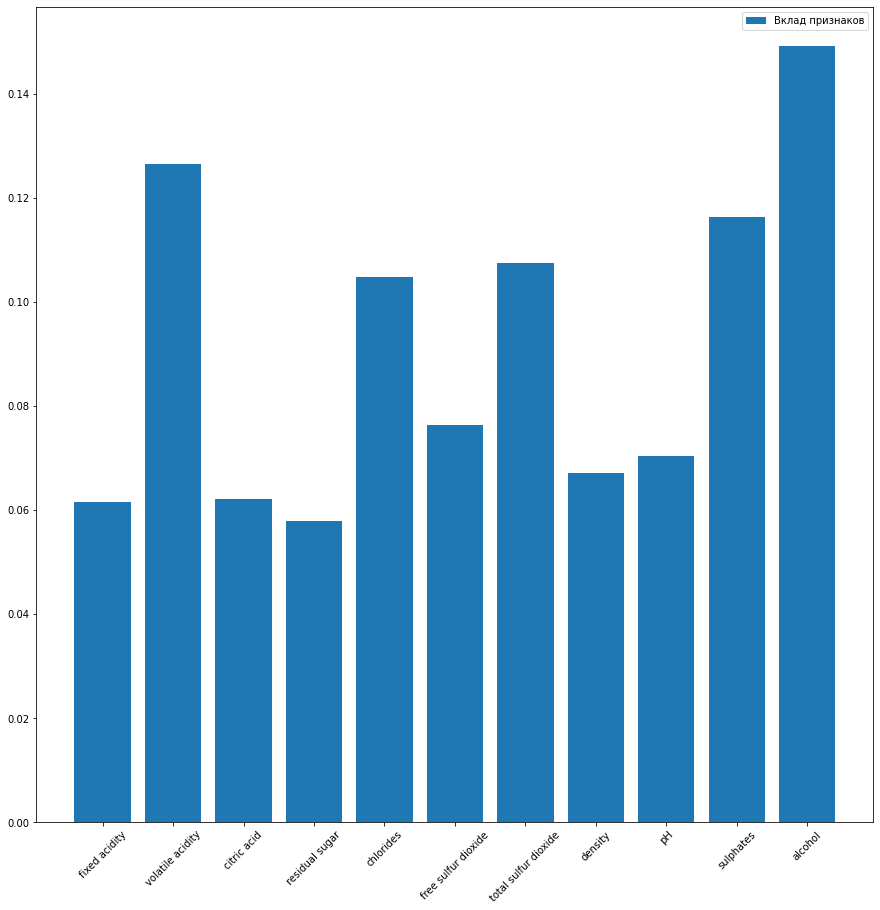

In [16]:
plot_features_coefs(X_test_sm.columns, rf.feature_importances_)

Наиболее важными признаками являются alcohol, sulphates, volatile acidity

# Сравнение результатов с использованием кросс-валидации и без нее

Используем кросс-валидацию

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
res = cross_val_score(rf, X_train_sm, y_train_sm, cv=5)
print(res.max())

0.8246628131021194


Не используем кросс-валидацию

In [18]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_sm, y_train_sm)
sc = rf.score(X_test_sm, y_test_sm)
print(sc)

0.8429561200923787


# Градиентный бустинг

Установим catboost от Яндекса

In [19]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


Проведем обучение

In [20]:
%%time
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import numpy as np

scores = np.ndarray([10, 10])
for i, n_trees in enumerate(np.linspace(1, 100, 10)):
    for j, depth in enumerate(np.arange(2, 12)): 
        p = CatBoostRegressor(n_estimators=n_trees, max_depth=depth).fit(X_train_sm, y_train_sm).predict(X_test_sm)
        scores[i, j] = mean_squared_error(y_test_sm, p)

Streaming output truncated to the last 5000 lines.
1:	learn: 1.0500643	total: 2.17ms	remaining: 22.8ms
2:	learn: 0.9328063	total: 6.39ms	remaining: 42.6ms
3:	learn: 0.8782798	total: 8.4ms	remaining: 39.9ms
4:	learn: 0.8406423	total: 9.53ms	remaining: 34.3ms
5:	learn: 0.8184015	total: 10.7ms	remaining: 30.4ms
6:	learn: 0.8058655	total: 12ms	remaining: 27.5ms
7:	learn: 0.7950279	total: 13.1ms	remaining: 24.5ms
8:	learn: 0.7810946	total: 14.2ms	remaining: 22ms
9:	learn: 0.7769879	total: 15.3ms	remaining: 19.9ms
10:	learn: 0.7700540	total: 16.5ms	remaining: 18ms
11:	learn: 0.7626442	total: 17.7ms	remaining: 16.2ms
12:	learn: 0.7555895	total: 18.8ms	remaining: 14.5ms
13:	learn: 0.7505728	total: 20ms	remaining: 12.9ms
14:	learn: 0.7441561	total: 21.2ms	remaining: 11.3ms
15:	learn: 0.7416660	total: 22.3ms	remaining: 9.77ms
16:	learn: 0.7381412	total: 23.5ms	remaining: 8.3ms
17:	learn: 0.7337607	total: 24.7ms	remaining: 6.85ms
18:	learn: 0.7310346	total: 25.8ms	remaining: 5.43ms
19:	learn: 0.7

Проиллюстрируем улучшение работы, от увеличения глубины деревьев

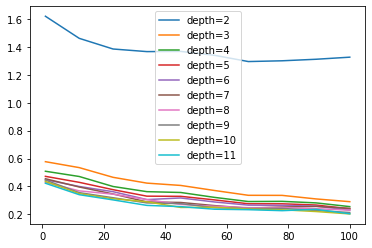

In [21]:
from ast import increment_lineno
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
for i in range(scores.shape[0]):
  plt.plot(np.linspace(1,100,10),scores[i], label='depth=' + str(np.arange(2,12)[i]))
  plt.legend()

Проверим среднеквадратичную ошибку у случайного леса

In [22]:
%%time

from sklearn.ensemble import RandomForestRegressor

linear_preds = RandomForestRegressor().fit(X_train_sm, y_train_sm).predict(X_test_sm)
res5 = mean_squared_error(y_test_sm, linear_preds) ** 0.5
print(res5)

0.4664640217667075
CPU times: user 1.54 s, sys: 4.47 ms, total: 1.54 s
Wall time: 1.59 s


Градиентный бустинг уменьшает среднюю квадратиную ошибку

In [23]:
%%time
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import numpy as np

scores = np.ndarray([10, 10])
for i, n_trees in enumerate(np.linspace(1, 100, 10)):
    for j, depth in enumerate(np.arange(2, 12)):
        p = CatBoostRegressor(n_estimators=n_trees, max_depth=depth, task_type="GPU").fit(X_train_sm, y_train_sm).predict(X_test_sm)
        scores[i, j] = mean_squared_error(y_test_sm, p)

Streaming output truncated to the last 5000 lines.
1:	learn: 1.0999626	total: 11.7ms	remaining: 122ms
2:	learn: 0.9901556	total: 14.6ms	remaining: 97.6ms
3:	learn: 0.9091319	total: 17.7ms	remaining: 83.9ms
4:	learn: 0.8643836	total: 20.7ms	remaining: 74.5ms
5:	learn: 0.8269735	total: 27.7ms	remaining: 78.5ms
6:	learn: 0.8139319	total: 41.1ms	remaining: 94.1ms
7:	learn: 0.8005043	total: 49.2ms	remaining: 92.2ms
8:	learn: 0.7913245	total: 52.1ms	remaining: 81ms
9:	learn: 0.7808252	total: 54.8ms	remaining: 71.2ms
10:	learn: 0.7719239	total: 62ms	remaining: 67.6ms
11:	learn: 0.7682589	total: 64.8ms	remaining: 59.4ms
12:	learn: 0.7610012	total: 67.6ms	remaining: 52ms
13:	learn: 0.7565166	total: 76.7ms	remaining: 49.3ms
14:	learn: 0.7520600	total: 83.4ms	remaining: 44.5ms
15:	learn: 0.7469321	total: 86.3ms	remaining: 37.8ms
16:	learn: 0.7426544	total: 88.9ms	remaining: 31.4ms
17:	learn: 0.7397365	total: 96.6ms	remaining: 26.8ms
18:	learn: 0.7354318	total: 99.5ms	remaining: 21ms
19:	learn: 0.

Используя кросс валидацию результат лучше